# Perceptrons multicouches 

````{prf:definition} Perceptron multicouches
Un perceptron à $(L+1)$ couches ({numref}`mlp`) est un réseau constitué d'une
rétine à $D$ neurones (auxquels on rajoute l'entrée $x_0$), $C$ neurones
de sortie, et des neurones dits **cachés**, organisés dans $L$ couches
cachées intermédiaires. De fait, un tel réseau comporte $(L+2)$ couches
mais on compte rarement la rétine, puisque cette dernière n'effectue pas
de calculs. Le $i^{\text{e}}$ neurone dans la couche cachée $l$ calcule
la sortie 

$$\begin{aligned}
    y_i^{(l)} &= f\left(z_i^{(l)}\right) \quad\text{ avec }\quad z_i^{(l)} = \sum _{k = 1} ^{m^{(l-1)}} w_{i,k}^{(l)} y_k^{(l-1)} + w_{i,0}^{(l)}
\end{aligned}$$ 

où $w_{i,k}^{(l)}$ est le poids de la connexion entre le
$k^{\text{e}}$ neurone de la couche $(l-1)$ et le $i^{\text{e}}$ neurone
de la couche $l$, et $w_{i,0}^{(l)}$ est le biais. De plus, $m^{(l)}$
est le nombre de neurones de la couche $l$, de sorte que $D = m^{(0)}$
et $C = m^{(L+1)}$. Enfin, $f$ est la fonction d'activation du neurone
(supposée identique pour tous les neurones).
````

En introduisant dans chaque couche un neurone supplémentaire
$y_0^{(l)} = 1$ pour gérer le biais, on a : 

$$\begin{aligned}
    {\mathbf z_i^{(l)}} = \displaystyle\sum _{k = 0} ^{m^{(l-1)}} {\mathbf w_{i,k}^{(l)}} {\mathbf y_k^{(l-1)}}\quad \text{ où }\quad {\mathbf z^{(l)}} = {\mathbf w^{(l)} y^{(l-1)}}
\end{aligned}$$ 

avec ${\mathbf z^{(l)}}$, $\mathbf{w^{(l)}}$ et $\mathbf{y^{(l-1)}}$ les
représentations vectorielle et matricielle des entrées $z_i^{(l)}$, des
poids $w_{i,k}^{(l)}$ et des sorties $y_k^{(l-1)}$.


```{figure} ./images/mlp.png
:name: mlp
Perceptron multicouches à $(L + 1)$ couches, $D$ entrées et $C$ sorties.
```








Un tel réseau représente une fonction 

$$\begin{aligned}
    {\mathbf y}(\cdot,{\mathbf w}) &:& \mathbb{R}^D \rightarrow \mathbb{R}^C\\
    {\mathbf x} &\mapsto& {\mathbf y(x,w)}
\end{aligned}$$ 

où ${\mathbf y(x,w)}$ est tel que ${\mathbf y_i}({\mathbf x},{\mathbf w}) = {\mathbf y_i^{(L+1)}}$ et ${\mathbf w}$
est la matrice de tous les poids du réseau.

On parlera de **réseau profond (Deep network)** lorsque le nombre de
couches cachées est "suffisamment important" (supérieur à 3 par exemple).

## Fonctions d'activation 

Trois grandes classes de fonction d'activation $f$ sont généralement
utilisées : les fonctions de seuils (comme dans le perceptron linéaire à
seuil), les fonctions linéaires par morceau et les fonctions de type
sigmoïde. Dans les deux premiers cas, de nombreux problèmes se
présentent, notamment en raison de la non différentiabilité de ces
fonctions (qui est nécessaire dans les algorithmes d'apprentissage du
type descente de gradient), ou encore en raison de la faiblesse de leur
pouvoir d'expression. Ainsi, il est préférable d'utiliser des fonctions
de type sigmoïde, et par exemple la sigmoïde logistique est donnée par :

$$\begin{aligned}
    \sigma(z) = \frac{1}{1 + \exp(-z)}.
\end{aligned}$$

La tangente hyperbolique $\tanh(z)$, également utilisée pour ses bonnes
propriétés de dérivabilité ($(\tanh)'=1-\tanh^2$), peut être vue comme
une transformation linéaire de la sigmoïde dans l'intervalle $[-1,1]$.

Ces réseaux peuvent être utilisés en régression (sortie à valeurs dans
$\mathbb{R}^C$) ou en classification. Dans ce dernier cas, la fonction
d'activation softmax est utilisée à la sortie du réseau pour interpréter
les sorties comme des valeurs de probabilité a posteriori. S'il s'agit
de classer un exemple $x$ à la classe $c$, la probabilité conditionnelle
$p(c|x)$ peut être calculée en utilisant la règle de Bayes :

$$\begin{aligned}
p(c|x) = \frac{p(x|c)p(c)}{p(x)}
\end{aligned}$$ 

$p(c|x)$ est alors interprétée comme une probabilité a
posteriori. Disposant de ces probabilités pour tout $c=1,\ldots,C$, la
règle de décision de Bayes donne :

$$\begin{aligned}
c: \mathbb{R}^D \rightarrow \{1,\ldots,C\}, x \mapsto  argmax_{c}\left(p(c|x)\right).
\end{aligned}$$ 

L'utilisation de la fonction d'activation softmax en
sortie permet d'interpréter les sorties du réseau comme de telles
probabilités :la sortie du $i^{\text{e}}$ neurone de la couche de sortie
est

$$\begin{aligned}
    \sigma(z^{(L+1)},i) = \frac{\exp(z_i^{(L+1)})}{\displaystyle\sum_{k = 1} ^C \exp(z_k^{(L+1)})}.
\end{aligned}$$

En apprentissage profond, il a été reporté que la sigmoïde et la
tangente hyperbolique avaient des performances moindres que la fonction
d'activation softsign : 

$$\begin{aligned}
    s(z) = \frac{1}{1+ |z|}.
\end{aligned}$$ 

En effet, les valeurs de $z$ arrivant près des paliers
de saturation de ces fonctions donnent des gradients faibles, qui ont
tendance à s'annuler lors de la phase d'apprentissage détaillée plus
loin (rétropropagation du gradient). Une autre fonction, non saturante
elle, peut être utilisée : 

$$\begin{aligned}
    r(z) = \max (0,z).
\end{aligned}$$ 

Les neurones cachés utilisant la fonction décrite dans
l'équation précédente sont appelés neurones linéaires rectifiés
(**Rectified Linear Units, ReLUs**), et sont en pratique très utilisés.

Quelques fonctions d'activation sont présentées dans la {numref}`tabact`.

```{figure} ./images/tabactivation.png
:name: tabact
Quelques fonctions d'activation
```

Les fonctions d'activation sous Pytorch sont résumées [ici](https://pytorch.org/docs/stable/nn.functional.html).

## Entraînement des réseaux multicouches 

Pour pouvoir utiliser les réseaux multicouches en apprentissage, deux
ingrédients sont indispensables :

-   une méthode indiquant comment choisir une architecture de réseau
    pour résoudre un problème donné. C'est-à-dire, pouvoir répondre aux
    questions suivantes : combien de couches cachées ? combien de
    neurones par couche cachée ?

-   une fois l'architecture choisie, un algorithme d'apprentissage qui
    calcule, à partir d'un l'échantillon d'apprentissage
    ${\cal E}_a = \left \{({\mathbf x_n}, \mathbf t_n),n\in[\![1,N]\!] \right \}$ , les
    valeurs des poids synaptiques pour construire un réseau adapté au
    problème (c'est à dire approchant une fonction $g$ désirée mais
    inconnue, telle qu'en particulier $\mathbf t_n \approx {\mathbf g(x_n)}$) .

Sur le premier point, quelques algorithmes d'apprentissage
auto-constructifs ont été proposés. Leur rôle est double :

-   apprentissage de l'échantillon avec un réseau courant,

-   modification du réseau courant, en ajoutant de nouvelles cellules ou
    une nouvelle couche, en cas d'échec de l'apprentissage.

Il semble assez facile de concevoir des algorithmes auto-constructifs
qui classent correctement l'échantillon, mais beaucoup plus difficile
d'en obtenir qui aient un bon pouvoir de généralisation.\
Il a fallu attendre le milieu des années 1980 pour que le deuxième
problème trouve une solution : l'algorithme de **rétropropagation du
gradient**.

L'entraînement, comme dans le cas de l'algorithme
de descentre de gradient, consiste à trouver les poids qui minimisent une
fonction d'erreur, mesurant l'écart entre la sortie du réseau $y({\mathbf x_n})$
et $\mathbf t_n$, pour tous les exemples de ${\cal E}_a$. Les fonctions
couramment choisies sont les sommes des fonctions de perte sur chaque
exemple, et incluent l'erreur quadratique 

$$\begin{aligned}
    E(\mathbf w) = \displaystyle\sum_{n = 1}^N E_n(\mathbf w) = \displaystyle\sum_{n = 1}^N \sum_{i = 1}^C (y_i(\mathbf x_n,\mathbf w) - t^i_{n})^2
\end{aligned}$$ 

ou l'erreur d'entropie croisée 

$$\begin{aligned}
    E(\mathbf w) = \displaystyle\sum_{n = 1}^N E_n(\mathbf w) = \displaystyle\sum_{n = 1}^N \sum_{i = 1}^C t^i_{n} \log(y_i(\mathbf x_n,\mathbf w)),
\end{aligned}$$ 

où $t^i_{n}$ est la $i^{\text{e}}$ composante de $\mathbf t_n$.

## Stratégies d'entraînement

Parmi les stratégies d'entraînement qui peuvent être retenues, trois
sont classiquement utilisées

-   entraînement sur ${\cal E}_a$, les poids étant mis à jour après
    présentation, en fonction de l'erreur totale
    $E(\mathbf w) = \displaystyle\sum_{n=1}^N E_n(\mathbf w)$.

-   entraînement stochastique : un exemple est présenté et les poids
    sont mis à jour sur l'erreur $E_n(\mathbf w)$ calculée sur cet exemple
    (règle Adaline)

-   entraînement par batch sur un sous-ensemble
    $M \subseteq \{1,\ldots,N\}$ de ${\cal E}_a$, les poids étant mis à
    jour en fonction de l'erreur cumulée
    $E_M(\mathbf w) = \displaystyle\sum_{n \in M} E_n(\mathbf w)$.

## Optimisation des paramètres 

Considérons le cas de l'entraînement stochastique. La condition
nécessaire d'optimalité d'ordre 1 donne 

$$\begin{aligned}
    \frac{\partial E_n}{\partial \mathbf w} = \nabla E_n(\mathbf w) = 0
\end{aligned}$$

Une méthode itérative est utilisée pour trouver une solution approchée.
Si $\mathbf w[t]$ est le vecteur de poids à la $t^{\text{e}}$ itération, une
mise à jour des poids $\Delta \mathbf w[t]$ est calculée et propagée à
l'itération suivante : $\mathbf w[t+1] = \mathbf w[t] + \Delta \mathbf w[t]$. Comme dans le cas du perceptron, on peut utiliser une méthode de type descente de gradient
(ordre 1), ou une méthode type Newton (ordre 2, qui nécessite alors le
calcul ou l'estimation du Hessien $H_n$ de $E_n$ à chaque itération).

-   pour la méthode de descente du gradient, la mise à jour est effectuée
    par 

    $$\begin{aligned}
                \Delta \mathbf w[t] = - \gamma \frac{\partial E_n}{\partial \mathbf w[t]} = - \gamma \nabla E_n (\mathbf w[t])
            
    \end{aligned}$$ 
    
    où $\gamma$ est le taux d'apprentissage.

-   pour les méthodes d'ordre 2, type Newton, la mise à jour s'effectue
    selon le schéma 
    
    $$\begin{aligned}
            \Delta \mathbf w[t] = - \gamma \left(\frac{\partial^2 E_n}{\partial \mathbf w[t]^2}\right)^{-1} \frac{\partial E_n}{\partial \mathbf w[t]} = - \gamma \left(\mathbf H_n\mathbf (\mathbf w[t])\right)^{-1} \nabla E_n(\mathbf w[t])  
    \end{aligned}$$ 
    
    où $\gamma$ est le taux d'apprentissage. L'ordre 2 assure une convergence plus rapide, mais requiert le calcul et l'inversion du Hessien $\mathbf H_n(\mathbf w[t])$ de $E_n$, ce qui est coûteux.


(content:references:initW)=

## Initialisation des poids 

Une méthode itérative d'optimisation étant utilisée, l'initialisation
des poids requiert une attention toute particulière. 

Une première idée est d'initialiser les poids selon une loi normale : $\forall i\; w_{ij} \rightsquigarrow 10^{-m}\mathcal{N}(0,1)\ m>0 $. Cependant, cela amène naturellement rapidement à une évolution des poids vers des valeurs nulles ({numref}`vanishing`) (phénomène de disparition du gradient).


```{figure} ./images/vanishing.png
:name: vanishing
Evolution de la distribution des poids au cours des epochs d'apprentissage (10 epochs à gauche, 20 au centre et 50 epochs à droite).
```

Plus le réseau est profond, plus l'apprentissage sera sensible à ce phénomène. On parle de *disparition du gradient* (venishing gradient).

En faisant l'hypothèse que les entrées de chaque cellule de la rétine sont
distribuées selon une loi gaussienne, il est alors courant d'introduire une dépendance à la profondeur des couches considérées : on choisit les poids aléatoirement dans 

$$\begin{aligned}
    - \frac{1}{\sqrt{m^{(l-1)}}} < w_{i,j}^{(l)} < \frac{1}{\sqrt{m^{(l-1)}}}.
\end{aligned}$$

En utilisant des fonctions d'activation sigmoïde, il a été prouvé que
l'apprentissage était alors optimal, en le sens que l'apprentissage est
rapide et que les poids atteignent une valeur stable quasiment tous en
même temps.

Un autre schéma d'initialisation est possible (initialisation
normalisée, ou initialisation de Xavier) en choisissant

$$\begin{aligned}
    - \frac{\sqrt{6}}{\sqrt{m^{(l-1)} + m^{(l)}}} < w_{i,j}^{(l)} < \frac{\sqrt{6}}{\sqrt{m^{(l-1)} + m^{(l)}}}.
\end{aligned}$$

Donnons quelques éléments qui amènent à ce schéma. Supposons un perceptron multicouches avec $\mathbf w\in\mathbb{R}^d, w_i i.i.d \rightsquigarrow\mathcal{N}(0,1)$ et d'entrées $\mathbf x\in\mathbb{R}^d$, $x_i\ \  i.i.d \rightsquigarrow\mathcal{N}(0,1)$. 

Le potentiel post-synaptique d'un neurone de la première couche cachée est de la forme $\mathbf w^\top \mathbf x$.

Alors 

$$\begin{aligned} Var(\mathbf w^\top\mathbf x) =& \displaystyle\sum_{i=1}^d Var (w_ix_i) \\
=&  \displaystyle\sum_{i=1}^d \left (\mathbb{E}(w_i)^2Var(x_i) + \mathbb{E}(x_i)^2Var (w_i) + Var (w_i) Var(x_i) \right )
\end{aligned}$$


Puisque $\mathbb{E}(w_i)=\mathbb{E}(x_i)=0$

$$Var(\mathbf w^\top\mathbf x) =  \displaystyle\sum_{i=1}^dVar (w_i) Var(x_i) $$

Or $w_i,\ x_i i.i.d $  donc $ Var(\mathbf w^\top\mathbf x) =  dVar (w_i) Var(x_i) $

Et plus généralement 

$$Var(y^l) = \left ( d Var(w_i)\right )^l Var (x_i)$$ 

Chaque neurone peut varier d'un facteur $d$ par rapport à son entrée.

Si $dVar(w_i)>1$ le gradient croît à mesure que l'on s'enfonce dans le réseau. A l'inverse, si $d Var(w_i)<1$  le gradient disparaît lorsque $l$ croît. 

Il est donc légitime pour imiter ces deux phénomènes d'imposer  $d Var(w_i)=1$, et donc $ Var(w_i)=1/d$
et  

$$\mathbf  w_{ij}^l \rightsquigarrow\ \frac{1}{\sqrt{m^{l-1}}}\mathcal{N}(0,1)$$

Si la fonction d'activation du neurone est la fonction ReLU, on peut multiplier par $\frac{\sqrt{2}}{\sqrt{m^{l-1}}}$ pour prendre en compte la partie négative qui ne participe pas au calcul de la variance.


## Rétropropagation de l'erreur 

l'{prf:ref}`backprop`, dit algorithme de
rétropropagation du gradient, est utilisé pour évaluer le gradient
$\nabla E_n (\mathbf w[t])$ de l'erreur $E_n$ à chaque itération, ceci pour tous
les poids

```{prf:algorithm} Algorithme de rétropropagation du gradient
:label: backprop
1.  Propager un exemple $\mathbf x_n$ dans le réseau.
2.  Calculer les erreurs $\delta_i^{(L+1)}$ des neurones de sortie :

    $$\begin{aligned}
                (\forall i\in\{1\cdots C\})\quad\delta_i^{(L+1)} = \frac{\partial E_n}{\partial y_i^{(L+1)}} f'(z_i^{(L+1)}).
            
    \end{aligned}$$
3.  Déterminer $\delta _i ^{(l)}$ pour toutes les couches cachées :

    $$\begin{aligned}
                (\forall l\in\{1\cdots L\})(\forall i\in\{1\cdots m^l\})\quad\delta _i ^{(l)} = f' (z_i^{(l)}) \sum _{k = 1} ^{m^{(l+1)}} w_{i,k}^{(l+1)} \delta _k ^{(l+1)}.
            
    \end{aligned}$$
4.  Calculer les composantes du gradient : 

$$\begin{aligned}
                \frac{\partial E_n}{\partial w_{j,i}^{(l)}} = \delta _j ^{(l)} y_i^{(l-1)}.           
    \end{aligned}$$
```

Dans le cas d'un apprentissage stochastique, cet algorithme est appliqué
jusqu'à convergence, pour estimer les poids du réseau de neurones.

## Critères d'arrêt

Plusieurs critères d'arrêt peuvent être utilisés avec l'algorithme de
rétropropagation du gradient. Le plus commun consiste à fixer un nombre
maximum de périodes d'entraînement (sur ${\cal E}_a$), ce qui fixe
effectivement une limite supérieure sur la durée de l'apprentissage. Ce
critère est important car la rétropropagation n'offre aucune garantie
quant à la convergence de l'algorithme. Il peut arriver, par exemple,
que le processus d'optimisation reste pris dans un minimum local. Sans
un tel critère, l'algorithme pourrait ne jamais se terminer. Un deuxième
critère commun consiste à fixer une borne inférieure sur l'erreur
quadratique moyenne. Dépendant de l'application, il est parfois possible
de fixer *a priori* un objectif à atteindre. Lorsque l'indice de
performance choisi diminue en dessous de cet objectif, on considère
simplement que le réseau a suffisamment bien appris ses données et on
arrête l'apprentissage.\
Les deux critères précédents sont utiles mais ils comportent aussi des
limitations. Le critère relatif au nombre maximum de périodes
d'entraînement n'est aucunement lié à la performance du réseau. Le
critère relatif à l'erreur minimale obtenue mesure quant à lui un indice
de performance mais ce dernier peut engendrer du sur-apprentissage qui n'est pas désirable dans la pratique, surtout si l'on ne possède pas une grande quantité de données d'apprentissage, ou
si ces dernières ne sont pas de bonne qualité.\
Un processus d'apprentissage comme celui de la rétropropagation, vise à
réduire autant que possible l'erreur que commet le réseau. Mais cette
erreur est mesurée sur un ensemble de données d'apprentissage
${\cal E}_a$. Si les données sont bonnes, c'est-à-dire quelles
représentent bien le processus physique sous-jacent que l'on tente
d'apprendre ou de modéliser, et que l'algorithme a convergé sur un
optimum global, alors il devrait bien se comporter sur d'autres données
issues du même processus physique . Cependant, si les données
d'apprentissage sont partiellement corrompues par du bruit ou par des
erreurs de mesure, alors il n'est pas évident que la performance
optimale du réseau soit atteinte en minimisant l'erreur, lorsqu'on la
testera sur un jeu de données différent de celui qui a servi à
l'entraînement. On parle alors de la **capacité de généralisation** du
réseau, c'est-à-dire sa capacité à bien se comporter avec des données
qu'il n'a jamais vu auparavant.

Une solution à ce problème consiste à faire appel à un autre critère
d'arrêt basé sur une technique de validation croisée. Cette technique
consiste à utiliser deux ensembles indépendants de données. En pratique,
il s'agit de partitionner ${\cal E}_a$ pour entraîner le réseau en un
ensemble d'apprentissage (ajustement des poids) un ensemble de
validation (calcul d'un indice de performance). Le critère d'arrêt
consiste alors à stopper l'apprentissage lorsque l'indice de performance
calculé sur les données de validation cesse de s'améliorer pendant
plusieurs périodes d'entraînement. Lors de deux périodes successives
d'entraînement, des exemples peuvent être échangés entre ensembles
d'apprentissage et de validation.

## Propriété fondamentale

Terminons par une dernière remarque sur la puissance de représentation
des réseaux multicouches. La plupart des fonctions numériques peuvent
être approximées avec une précision arbitraire par des réseaux à une
seule couche cachée. Mais cette couche cachée peut être démesurément
grande et le théorème de Hornik, qui affirme cette propriété
d'approximateurs universels des réseaux multicouches, est
essentiellement un résultat théorique sur l'expressivité des réseaux.

Plus formellement, la propriété fondamentale des réseaux de neurones est
l'**approximation parcimonieuse**, qui traduit deux propriétés distinctes :
d'une part les réseaux de neurones sont des **approximateurs universels**,
et d'autre part, une approximation à l'aide d'un réseau de neurones
nécessite, en général, moins de paramètres ajustables que les
approximateurs usuels.

-   Approximateurs universels : Cybenko a énoncé en 1989 la propriété
    suivante : toute fonction bornée, suffisamment régulière, peut être
    approchée uniformément, avec une précision arbitraire, dans un
    domaine fini de l'espace de ses variables, par un réseau de neurones
    comportant une couche de neurones cachés en nombre fini, possédant
    tous la même fonction d'activation, et un neurone de sortie
    linéaire.

-   Parcimonie : Hornik a montré en 1994 que si la sortie d'un réseau de
    neurones est une fonction non linéaire des paramètres ajustables,
    elle est plus parcimonieuse que si elle était une fonction linéaire
    de ces paramètres. De plus, pour les réseaux dont la fonction
    d'activation des neurones est une sigmoïde, l'erreur commise dans
    l'approximation varie comme l'inverse du nombre de neurones cachés,
    et elle est indépendante du nombre de variables de la fonction à
    approcher. Ainsi, pour une précision donnée (*i.e.* étant donné un
    nombre de neurones cachés) le nombre de paramètres du réseau est
    proportionnel au nombre de variables de la fonction à approcher.

Dans la plupart des cas d'utilisation des réseaux de neurones, il va
s'agir d'établir un modèle d'une fonction inconnue à partir de mesures
bruitées de l'ensemble d'apprentissage, permettant de reproduire les
sorties à partir des entrées, et de proposer une généralisation à des
données test. On cherche alors la **fonction de régression** du
processus considéré, *i.e.* la fonction obtenue en calculant la moyenne
d'une infinité de mesures effectuées en chaque point du domaine de
validité du modèle. Le nombre de points de ce domaine étant lui-même
infini, la connaissance de la fonction de régression nécessiterait donc
une infinité de mesures en un nombre infini de points.

Les réseaux de neurones, en raison de leur propriété fondamentale, sont
de bons candidats pour réaliser une approximation de la fonction de
régression à partir d'un nombre fini de mesures. Ils entrent donc dans
le cadre des méthodes statistiques d'apprentissage, et élargissent ce
domaine déjà bien exploré pour des fonctions de régression linéaire au
cas non linéaire.


Pour illustration simple, on considère le problème d'apprentissage de la fonction $f(x)=x^2$ en utilisant un  réseau à une couche cachée de trois neurones, équipés de la fonction d'activation $tanh$ ({numref}`approx2`). La ({numref}`approx`) présente le résultat de l'apprentissage : en rouge sont représentés 50 points d'apprentissage, en bleu la fonction prédite sur l'intervalle [-1,1]. Les fonctions apprises par les trois neurones sont en pointillés, et la combinaison linéaire de ces fonctions donne la courbe prédite.

```{figure} ./images/exmlp.png
:name: approx2
:width: 500px
:align: center
Un perceptron multicouches à une couche cachée
```

```{figure} ./images/f1.png
:name: approx
Approximation de $f(x)=x^2$ par un réseau à une couche cachée.
```





(content:references:reg)=
## Régularisation

La notion d'approximateur universel peut induire également un problème
de surapprentissage (overfitting) de ${\cal E}_a$. Les techniques de
régularisation permettent d'éviter ce problème, et permettent aux
réseaux de neurones (et à d'autres algorithmes d'ailleurs, comme les
autoencodeurs ou les SVM par exemple) d'avoir une bonne capacité de
généralisation.\
Il existe plusieurs techniques permettant d'introduire de la
régularisation dans les réseaux. Parmi elles, on note :

-   ${\cal E}_a$ est enrichi pour introduire certaines invariances que
    le réseau est supposé apprendre.

-   à chaque exemple/batch présenté, chaque neurone caché est supprimé du
    calcul de la sortie avec probabilité $p$ (dropout). Cette technique
    peut être vue comme la construction d'un modèle moyen
    d'apprentissage de plusieurs réseaux distincts.

-   lorsque ${\cal E}_a$ est séparé en un ensemble d'apprentissage
    ${\cal E}^1_a$ et un ensemble de validation ${\cal E}^2_a$, il est
    courant de voir que l'erreur baisse sur ${\cal E}^1_a$ au fil des
    itérations, alors que l'erreur sur ${\cal E}^2_a$ tend à augmenter
    lorsque le réseau commence à sur-apprendre sur ${\cal E}^1_a$.
    L'entraînement est alors stoppé dès que l'erreur sur ${\cal E}^2_a$
    atteint un minimum. Cette technique est appelée early stopping
    (arrêt précoce).

-   le partage de poids : plusieurs neurones d'une même couche partagent
    des mêmes valeurs de poids. La complexité du réseau est réduite et
    des informations *a priori* peuvent être introduites par ce biais
    dans l'architecture du réseau. L'algorithme de rétropropagation du
    gradient s'en trouve modifié et l'étape 4 devient 
    
    $$\begin{aligned}
        \frac{\partial E_n}{\partial w_{j,i}^{(l)}} = \sum _{k = 1} ^{m^{(l)}} \delta_k^{(l)} y_i^{(l-1)}
    \end{aligned}$$ 
    
    en supposant que tous les neurones de la couche $l$
    sont tels que $w_{j,i}^{(l)} = w_{k,i}^{(l)}$ pour
    $1 \leq j,k \leq m^{(l)}$

-   un terme de régularisation est ajouté à la fonctionnelle à minimiser
    pour contrôler la complexité et le forme de la solution et, par
    exemple 
    
    $$\begin{aligned}
        \hat{E}_n (\mathbf w) = E_n (\mathbf w) + \eta P(\mathbf w)
    \end{aligned}$$ 
    
    où $P(\mathbf w)$ influence la forme de la solution et
    $\eta$ contrôle l'influence du terme de régularisation. $P(\mathbf w)$ peut
    prendre la forme d'une fonction de la norme $L_p$ de $\mathbf w$. Deux
    exemples classiques sont :

    -   la régularisation $\ell_2$ : $P(\mathbf w) = \|\mathbf w\|_2^2 = \mathbf w^\top \mathbf w$, où le principe est de pénaliser les poids de fortes valeurs, qui tendent à amplifier le problème de  surapprentissage.
    -   la régularisation $\ell_1$ : $P(\mathbf w) = \|\mathbf w\|_1 = \displaystyle\sum_{k = 1} ^W |w_k|$ où $W$ est la dimension de $\mathbf w$, qui tend à rendre épars le vecteur de poids (beaucoup de valeurs de poids deviennent nulles).

## Exemple

On va considérer le réseau décrit sur la ({numref}`xor`) pour apprendre la fonction du OU
exclusif (aussi appelé XOR). L'opérateur XOR est défini par sa table de
vérité donnée par le tableau  suivant 

| $x_1 \backslash x_2$ | 0 | 1 |
|-----------------------------|---|---|
| 0                           | 0 | 1 |
| 1                           | 1 | 0 |

### Réseau

Sur le réseau de la figure
({numref}`xor`) les différentes relations sont
données par l'équation suivante où les paramètres en rouge correspondent aux poids à
calculer durant la phase d'apprentissage.

$$\left\{
        \begin{array}{r c l}
            z_1 &=& {\color{red}w_1}~x_1+{\color{red}w_2}~x_2+{\color{red}b_1}\\
            z_2 &=& {\color{red}w_3}~x_1+{\color{red}w_4}~x_2+{\color{red}b_2}\\
            z_3 &=& {\color{red}w_5}~x_1+{\color{red}w_6}~x_2+{\color{red}b_3}\\
            z_4 &=& {\color{red}w_7}~h_1\left(z_1\right)+{\color{red}w_8}~h_2\left(z_2\right)+{\color{red}w_9}~h_3\left(z_3\right)+{\color{red}b_4}\\
            y &=& h_4\left(z_4\right) \\
            h_i\left(z_i\right) &=& \frac{1}{1+e^{-z_i}} \ \ \ \ (sigmoide)
        \end{array}
    \right .
    $$


```{figure} ./images/xor.png
:name: xor
Exemple de réseau pour apprendre le XOR
```




### Phase d'apprentissage

Durant la phase d'apprentissage, on minimise un risque empirique par une
fonction de coût. Dans cet exemple, nous allons choisir la minimisation
de l'écart quadratique avec la base d'apprentissage labelisée
${\cal E}_a =\left( \textbf{x}, {y}_{lab} \right)$ ou une partie
de cette base d'apprentissage $\mathcal{E}_a^\prime$ :

$$E\left({\cal E}_a\right)=E_{tot}=\displaystyle\frac{1}{2}\sum_k \left(y[k]_{lab} - y \right)^2 = \displaystyle\frac{1}{2}\sum_k\left(y[k]_{lab} - h_4\left(z_4\right)  \right)^2.$$

On peut utiliser qu'une partie de la base, voire que le $k^{ieme}$
échantillon de la base (gradient stochastique) :

$$E\left(x_k\right)=E_{k}=\displaystyle\frac{1}{2}\left(y[k]_{lab} - y \right)^2 = \displaystyle\frac{1}{2}\left(y[k]_{lab} - h_4\left(z_4\right)  \right)^2 .
    $$

L'objectif de la phase d'apprentissage est de mettre à jour les poids du
réseau par une approche de descente du gradient. Si l'on considère un
poids quelconque du réseau que l'on note $\theta$, sa mise à jour durant
l'itération $n+1$ se fait pas l'équation suivante:

$$\theta^{\left(n+1\right)} = \theta^{\left(n\right)} + \gamma_n\times \Delta \theta$$

où $\Delta \theta = -\nabla_\theta E$. 


On peut choisir $E=E_{tot}$ ou
$E=E_k$ et pour cet exemple nous choisirons le deuxième cas.

#### Couche de sortie

Pour la couche de sortie, prenons par exemple le paramètre $w_7$, sa
mise à jour est donnée par la relation suivante :

$$w_7^{\left(n+1\right)} = w_7^{\left(n\right)} - \eta \times \frac{\partial E_k}{\partial w_7}.$$

Le problème consiste à calculer $\frac{\partial E_k}{\partial w_7}$,
pour cela nous allons utiliser le théorème de dérivation des fonctions
composées, d'où:

$$\frac{\partial E_k}{\partial w_7} = \frac{\partial E_k}{\partial h_4} \times  \frac{\partial h_4}{\partial z_4} \times  \frac{\partial z_4}{\partial w_7}$$

Cette relation est représentée graphiquement sur la ({numref}`xor2`). 
Utilisant l'expression de A $E_k$ on a alors :

$$\left\{
        \begin{array}{r c l}
            \displaystyle\frac{\partial E_k}{\partial h_4} &=& \frac{\partial }{\partial h_4}\left( \frac{1}{2}\left(y[k]_{lab} - h_4\left(z_4\right)  \right)^2 \right) = -\left(y[k]_{lab} - h_4\left(z_4\right)  \right)\\
            \displaystyle\frac{\partial h_4}{\partial z_4}  &=& \frac{\partial }{\partial z_4}\left( \frac{1}{1+e^{-z_4}}\right) = \frac{e^{-z_4}}{\left(1+e^{-z_4}\right)^2} = h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) \\
            \displaystyle\frac{\partial z_4}{\partial w_7} &=& h_1\left(z_1\right)
        \end{array}
    \right.
    $$ 

d'où

$$w_7^{(n+1)} = w_7^{(n) }+ (y[k]_{lab} - h_4(z_4)) h_4(z_4)( 1 - h_4(z_4))
h_1(z_1)$$

On peut réaliser la même démarche pour les poids $w_8$, $w_9$ et $b_4$,
pour obtenir les relations suivantes :

$$\left\{
        \begin{array}{r c l}
            w_8^{\left(n+1\right)} &=& w_8^{\left(n\right)} + \eta \times \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_2\left(z_2\right) \\
            w_9^{\left(n+1\right)} &=& w_9^{\left(n\right)} + \eta \times \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_3\left(z_3\right) \\
            b_4^{\left(n+1\right)} &=& b_4^{\left(n\right)} + \eta \times \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) 
        \end{array}
    \right.
    $$

```{figure} ./images/xor2.png
:name: xor2
:width: 500px
:align: center
Rétropropagation du gradient sur la couche de sortie.
```

#### Couche cachée

Pour la couche cachée du réseau, c'est exactement le même raisonnement.
Prenons par exemple, le paramètre $w_1$ pour le calcul :

$$w_1^{\left(n+1\right)} = w_1^{\left(n\right)} - \eta \times \frac{\partial E_k}{\partial w_1}.$$

Le problème maintenant consiste à calculer
$\frac{\partial E_k}{\partial w_1}$, pour cela nous allons utiliser le
théorème de dérivation des fonctions composées, d'où:

$$\frac{\partial E_k}{\partial w_1} = \frac{\partial E_k}{\partial z_4} \times  \frac{\partial z_4}{\partial h_1}  \times  \frac{\partial h_1}{\partial z_1} \times  \frac{\partial z_1}{\partial w_1}$$

Cette relation est représentée graphiquement sur la ({numref}`xor3`). 
Utilisant les équations précédentes, on obtient alors  

$$\left\{
        \begin{array}{r c l}
            \displaystyle\frac{\partial E_k}{\partial z_4} &=& -\left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right)\\
            \displaystyle\frac{\partial z_4}{\partial h_1}  &=& w_7 \\
            \displaystyle\frac{\partial h_1}{\partial z_1} &=& h_1\left(z_1\right)\left( 1 - h_1\left(z_1\right)\right)\\
            \displaystyle\frac{\partial z_1}{\partial w_1} &=& x_1
        \end{array}
    \right.
    $$ 
    
 d'où

$$
w_1^{(n+1)} = w_1^{(n)} + (y[k]_{ lab} - h_4(z_4)) h_4(z_4)( 1 - h_4(z_4))h_1(z_1)( 1 - h_1(z_1)) w_7 x_1
$$

On peut réaliser la même démarche pour les poids $w_2$ et $b_1$, pour
obtenir les relations suivantes :

$$\left\{
        \begin{array}{r c l}
            w_2^{\left(n+1\right)} &=& w_2^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_1\left(z_1\right)\left( 1 - h_1\left(z_1\right)\right) w_7 x_2\\
            b_1^{\left(n+1\right)} &=& b_1^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_1\left(z_1\right)\left( 1 - h_1\left(z_1\right)\right) w_7
        \end{array}
    \right.
    $$

```{figure} ./images/xor3.png
:name: xor3
:width: 500px
:align: center
Rétropropagation du gradient sur la couche cachée.
```

Il suffit de réaliser des calculs identiques pour les autres neurones et
on obtient les relations suivantes :

 $$\left\{
            \begin{array}{r c l}
                w_3^{\left(n+1\right)} &=& w_3^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_2\left(z_2\right)\left( 1 - h_2\left(z_2\right)\right) w_8 x_1\\                
                w_4^{\left(n+1\right)} &=& w_4^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_2\left(z_2\right)\left( 1 - h_2\left(z_2\right)\right) w_8 x_2\\
                w_5^{\left(n+1\right)} &=& w_5^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_3\left(z_3\right)\left( 1 - h_3\left(z_3\right)\right) w_9 x_1\\                
                w_6^{\left(n+1\right)} &=& w_6^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_3\left(z_3\right)\left( 1 - h_3\left(z_3\right)\right) w_9 x_2\\
                b_2^{\left(n+1\right)} &=& b_2^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_2\left(z_2\right)\left( 1 - h_2\left(z_2\right)\right) w_8 \\
                b_3^{\left(n+1\right)} &=& b_3^{\left(n\right)} + \eta \left(y[k]_{lab} - h_4\left(z_4\right)\right) h_4\left(z_4\right)\left( 1 - h_4\left(z_4\right)\right) h_3\left(z_3\right)\left( 1 - h_3\left(z_3\right)\right) w_9               
            \end{array}
        \right.$$

#### Initialisation des poids 

-   les biais sont initialisés à zéro : 
    $( b_1, b_2, b_3, b_4 ) = \mathbf{0}_4$ ;

-   pour les poids $w_i$, ils sont initialisées de façon aléatoire
    dépendant de la taille de la couche d'avant $m^{(l-1)}$ et d'après
    $m^{(l)}$.
    L'initialisation de Xavier propose un tirage uniforme dans
    $\left[-\sqrt{\frac{6}{m^{(l-1)}+m^{(l)}}} ;\sqrt{\frac{6}{m^{(l-1)}+m^{(l)}}} \right]$.

Pour notre exemple, on obtient l'initialisation suivante : 

$$\left\{
        \begin{array}{r c l}
            w_1 \ ...\ w_6 &=& U\left ( \left[-\sqrt{\frac{6}{2+3}} ;\sqrt{\frac{6}{2+3}} \right] \right ) = U(\left[-1,09;1,09 \right])\\
            w_7 \ ... \ w_9 &=& U\left (\left[-\sqrt{\frac{6}{3+1}} ;\sqrt{\frac{6}{3+1}} \right]\right ) = U(\left[-1,23;1,23 \right])
        \end{array}
    \right.$$


## Implémentation

Nous reprenons les exemples du perceptron et montrons qu'un PMC à une couche cachée permet de résoudre le problème de séparation non linéaire.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
import torch
import torch.nn as nn
import torch.optim as optim

fichiers_train = ['./data/linear_data_train.csv','./data/twocircles_data_train.csv','./data/moon_data_train.csv']
fichiers_test = ['./data/linear_data_eval.csv','./data/twocircles_data_eval.csv','./data/moon_data_eval.csv']

# Fonction de lecture des jeux de données
def extract_data(filename):

    labels = []
    features = []

    for line in open(filename):
        row = line.split(",")
        labels.append(int(row[0]))
        features.append([float(x) for x in row[1:]])

    features_np = np.matrix(features).astype(np.float32)

    labels_np = np.array(labels).astype(dtype=np.uint8)
    labels_onehot = (np.arange(num_labels) == labels_np[:, None]).astype(np.float32)

    return features_np,labels_onehot    

On écrit une fonction permettant de visualiser le résultat de la classification par le perceptron.

In [2]:
def plotResults(ax,ay,X,Y,model,title,pltloss,name):
    mins = np.amin(X,0); 
    mins = mins - 0.1*np.abs(mins);
    maxs = np.amax(X,0); 
    maxs = maxs + 0.1*maxs;

    xs,ys = np.meshgrid(np.linspace(mins[0,0],maxs[0,0],300),np.linspace(mins[0,1], maxs[0,1], 300));

    toto = torch.FloatTensor(np.c_[xs.flatten(), ys.flatten()])
    Z = np.argmax(model(toto).detach().numpy(), axis=-1)
    Z=Z.reshape(xs.shape[0],xs.shape[1])
    
    labelY = np.matrix(Y[:, 0]+2*Y[:, 1])
    labelY = labelY.reshape(np.array(X[:, 0]).shape)

    ax.contourf(xs, ys, Z, cmap=colors.ListedColormap([[0,0.5,0.66,0], [0.93,0.76,0.27,0]]),alpha=.5)
    ax.scatter(np.array(X[:, 0]),np.array(X[:, 1]),c= np.array(labelY),s=20,cmap=colors.ListedColormap(['red', 'green']))
    ax.set_title(title)

    ay.plot(pltloss)
    ay.set_title("perte sur " + name)
    ay.set_xlabel("epoch")

    plt.tight_layout()

On implémente une classe PMC, dérivée de la clase `nn.Module`.

In [3]:
# Nombre de neurones de la couche cachée
num_hidden = 5

class PMC(nn.Module):
    def __init__(self,p):
        super().__init__()
        self.layers = nn.Sequential(
          nn.Linear(num_features, num_hidden),
          nn.Tanh(),
          nn.Linear(num_hidden, num_labels),
          nn.Softmax(1),
        )
        
    def forward(self, x): 
        return self.layers(x)

et on définit la fonction d'entraînement. La fonction de perte est l'[entropie croisée binaire](https://en.wikipedia.org/wiki/Cross_entropy) et l'optimiseur est [Adam ](https://arxiv.org/abs/1412.6980).

In [4]:
# Paramètres de l'apprentissage
batch_size = 100  
num_epochs = 10000
num_labels = 2 
num_features = 2

loss = nn.BCELoss()

def train_session(X,y,classifier,criterion,optimizer,n_epochs=num_epochs):
    loss_values = []    
    losses = np.zeros(n_epochs)
    correct = 0
    for iter in range(n_epochs):
        optimizer.zero_grad() 
        yPred = classifier(X)
        loss = criterion(yPred,y)
        loss_values.append(loss.detach().numpy())
        #Gradient et rétropropagation
        loss.backward()
        #Mise à jour des poids
        optimizer.step()
        y2 = yPred>0.5
        correct = (y2 == y).sum().item()/2
    acc = 100 * correct / (X.shape[0])
    return loss_values,acc

On applique enfin le perceptron sur les jeux de données et on visualise les résultats.

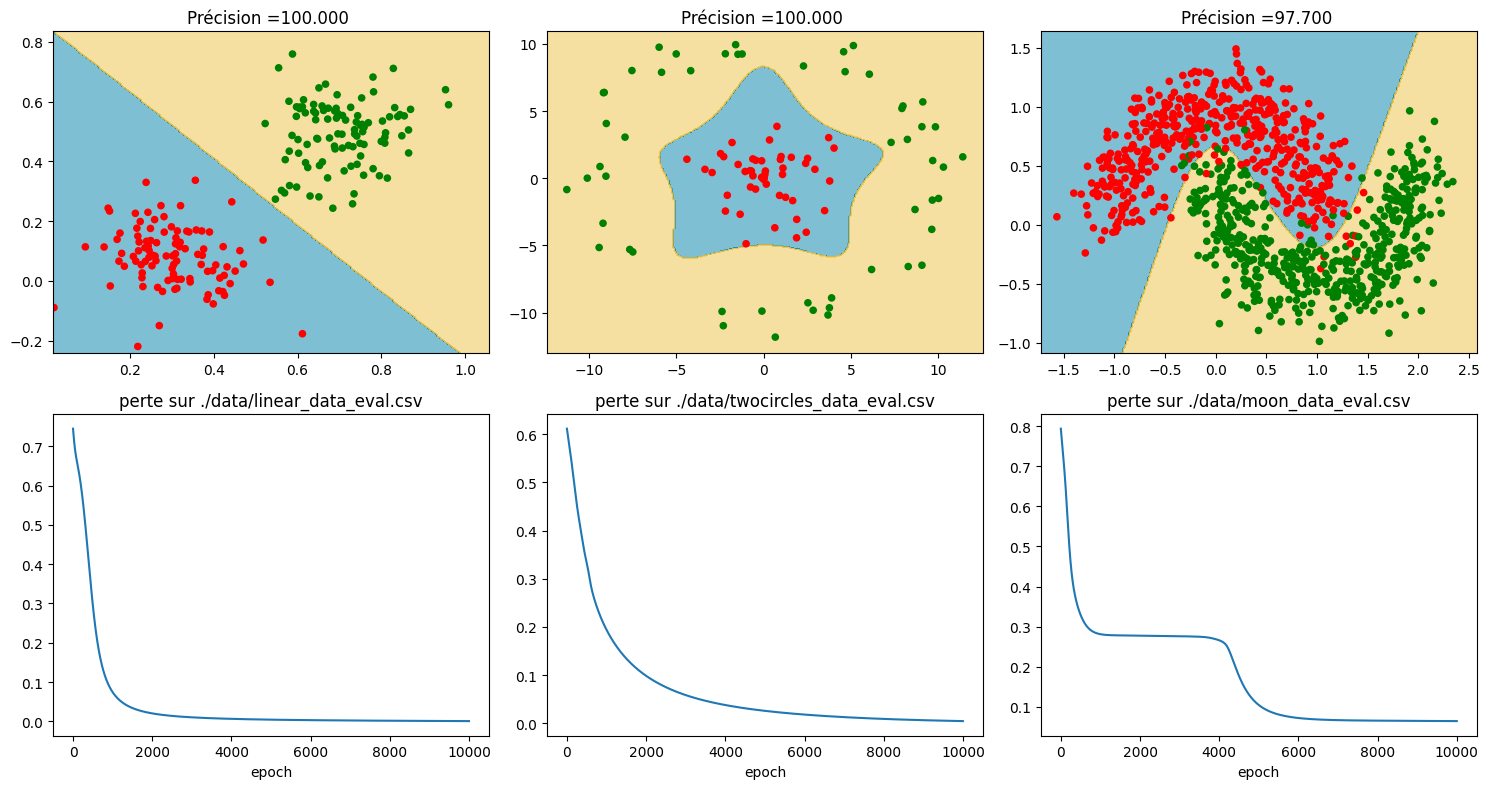

In [5]:
fig,axs = plt.subplots(2, 3,figsize=(15,8))
for i,name_train,name_test in zip ([0,1,2],fichiers_train,fichiers_test):
    train_data,train_labels = extract_data(name_train)
    test_data, test_labels = extract_data(name_test)

    model = PMC(train_data.shape[1])
    optimizer = optim.Adam(model.parameters())
    pltloss,acc = train_session(torch.FloatTensor(train_data),torch.FloatTensor(train_labels),model,loss,optimizer)
    
    titre= "Précision ={0:5.3f} ".format(acc)
    plotResults(axs[0][i],axs[1][i],test_data, test_labels, model, titre, pltloss, name_test)